In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from netCDF4 import Dataset

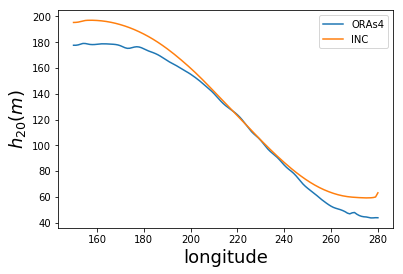

In [2]:
urlo='http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.TCC/.ORAs4/.h20-clim.nc/.h20/dods'
url='http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.TCC/.INC_ERA/.clim.nc/dods'
dsc  = xr.open_dataset(url)
dpac = dsc.sel(Y=slice(-5,5),X=slice(150,280)).mean(dim=('Y'))

dsco  = xr.open_dataset(urlo)
dpaco = dsco.sel(Y=slice(-5,5),X=slice(150,280)).mean(dim=('Y'))

dpaco.h20.plot(label='ORAs4')
dpac.h20.plot(label='INC')
plt.legend(loc='upper right')
plt.xlabel(r'longitude', fontsize=18)
plt.ylabel(r'$h_{20}(m)$', fontsize=18)
#plt.axis([0, 360, 0, 250])
plt.show()

In [3]:
p2 = np.poly1d(np.polyfit(dpac.h20, dpaco.h20, 2))
coeffs = p2.c
print(p2.c)

[ -3.29904452e-03   1.80514453e+00  -4.86265447e+01]


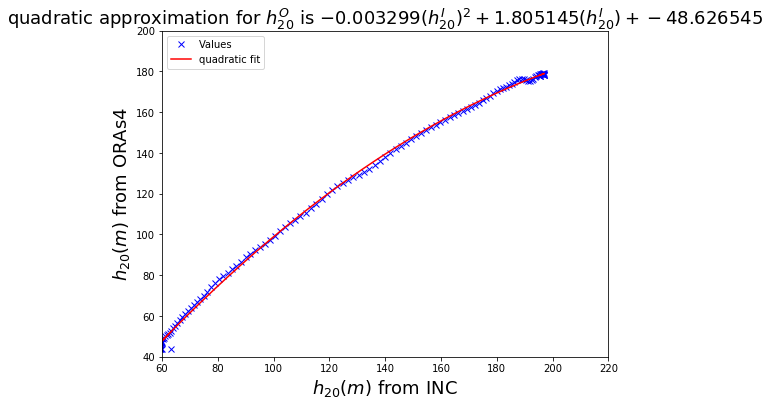

In [4]:
plt.figure(figsize=(8,6))
plt.plot(dpac.h20, dpaco.h20, 'bx',label='Values')
title='quadratic approximation for $h_{20}^O$ is $%f (h_{20}^I)^2 + %f (h_{20}^I) + %f $' %(coeffs[0],coeffs[1],coeffs[2])

#plt.plot(knots_pac,fsp(knots_pac),'ko')
plt.plot(dpac.h20, p2(dpac.h20), 'r-',label='quadratic fit')
plt.axis([60, 220, 40, 200])

#plt.title(r'Spline fit', fontsize=18)
plt.xlabel(r'$h_{20}(m)$ from INC', fontsize=18)
plt.ylabel(r'$h_{20}(m)$ from ORAs4', fontsize=18)
plt.legend(loc='upper left')
plt.title(title, fontsize=18)
plt.show()

In [5]:
np.savetxt('p2-coeffs.txt',coeffs)